# Student Performance Analysis Project

## Introduction
This project analyzes factors affecting student academic performance. We'll explore how different variables such as study habits, sleep patterns, attendance, and socioeconomic background influence student grades.

### Variables in our Analysis:
1. Socioeconomic Score (0-1 scale)
2. Study Hours (hours per day)
3. Sleep Hours (hours per day)
4. Attendance (%)
5. Grades (final scores)

Let's analyze this data step by step to understand what factors contribute most to student success.

## 1. Setting Up Our Analysis Environment

In [3]:
# Import required libraries
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For creating plots
import seaborn as sns  # For statistical visualizations
import numpy as np  # For numerical operations

# Set up plotting settings
plt.style.use('default')  # Use clean plotting style
plt.rcParams['figure.figsize'] = [10, 6]  # Set default figure size
plt.rcParams['figure.dpi'] = 100  # Set figure resolution

## 2. Loading and Examining Our Data

In [5]:
# Read the dataset
df = pd.read_csv('Student_Performance_Prediction.csv')

In [6]:
# Display first few rows
print("First 5 rows of our dataset:")
display(df.head())

First 5 rows of our dataset:


,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
0,0.95822,3.4,8.2,53.0,47.0
1,0.85566,3.2,5.9,55.0,35.0
2,0.68025,3.2,9.3,41.0,32.0
3,0.25936,3.2,8.2,47.0,34.0
4,0.60447,3.8,10.0,75.0,33.0


In [7]:
# Display basic information
print("\nDataset Information:")
print(f"Number of students: {df.shape[0]}")
print(f"Number of variables: {df.shape[1]}")


Dataset Information:
Number of students: 1388
Number of variables: 5


In [8]:
# Display data types
print("\nVariable types:")
display(df.dtypes)


Variable types:


Socioeconomic Score    float64
Study Hours            float64
Sleep Hours            float64
Attendance (%)         float64
Grades                 float64
dtype: object

## 3. Basic Statistical Analysis

Let's calculate key statistics to understand our data:

In [10]:
# Calculate descriptive statistics
print("Statistical Summary:")
display(df.describe().round(2))

# Calculate and display key metrics
print("\nKey Metrics:")
print(f"Average study hours: {df['Study Hours'].mean():.2f} hours per day")
print(f"Average sleep hours: {df['Sleep Hours'].mean():.2f} hours per day")
print(f"Average attendance: {df['Attendance (%)'].mean():.2f}%")
print(f"Average grade: {df['Grades'].mean():.2f}")
print(f"Average socioeconomic score: {df['Socioeconomic Score'].mean():.2f}")

Statistical Summary:


,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
count,1388.00,1388.00,1388.00,1388.00,1388.00
mean,0.55,4.56,8.05,58.54,40.69
std,0.26,1.90,1.37,11.68,9.47
min,0.10,0.80,4.80,40.00,32.00
25%,0.32,3.48,7.00,49.00,34.00
50%,0.55,3.90,8.40,57.00,35.00
75%,0.79,5.90,9.10,66.00,47.00
max,1.00,10.00,10.00,100.00,91.00



Key Metrics:
Average study hours: 4.56 hours per day
Average sleep hours: 8.05 hours per day
Average attendance: 58.54%
Average grade: 40.69
Average socioeconomic score: 0.55


## 4. Data Visualization

Let's create visualizations to better understand our data:

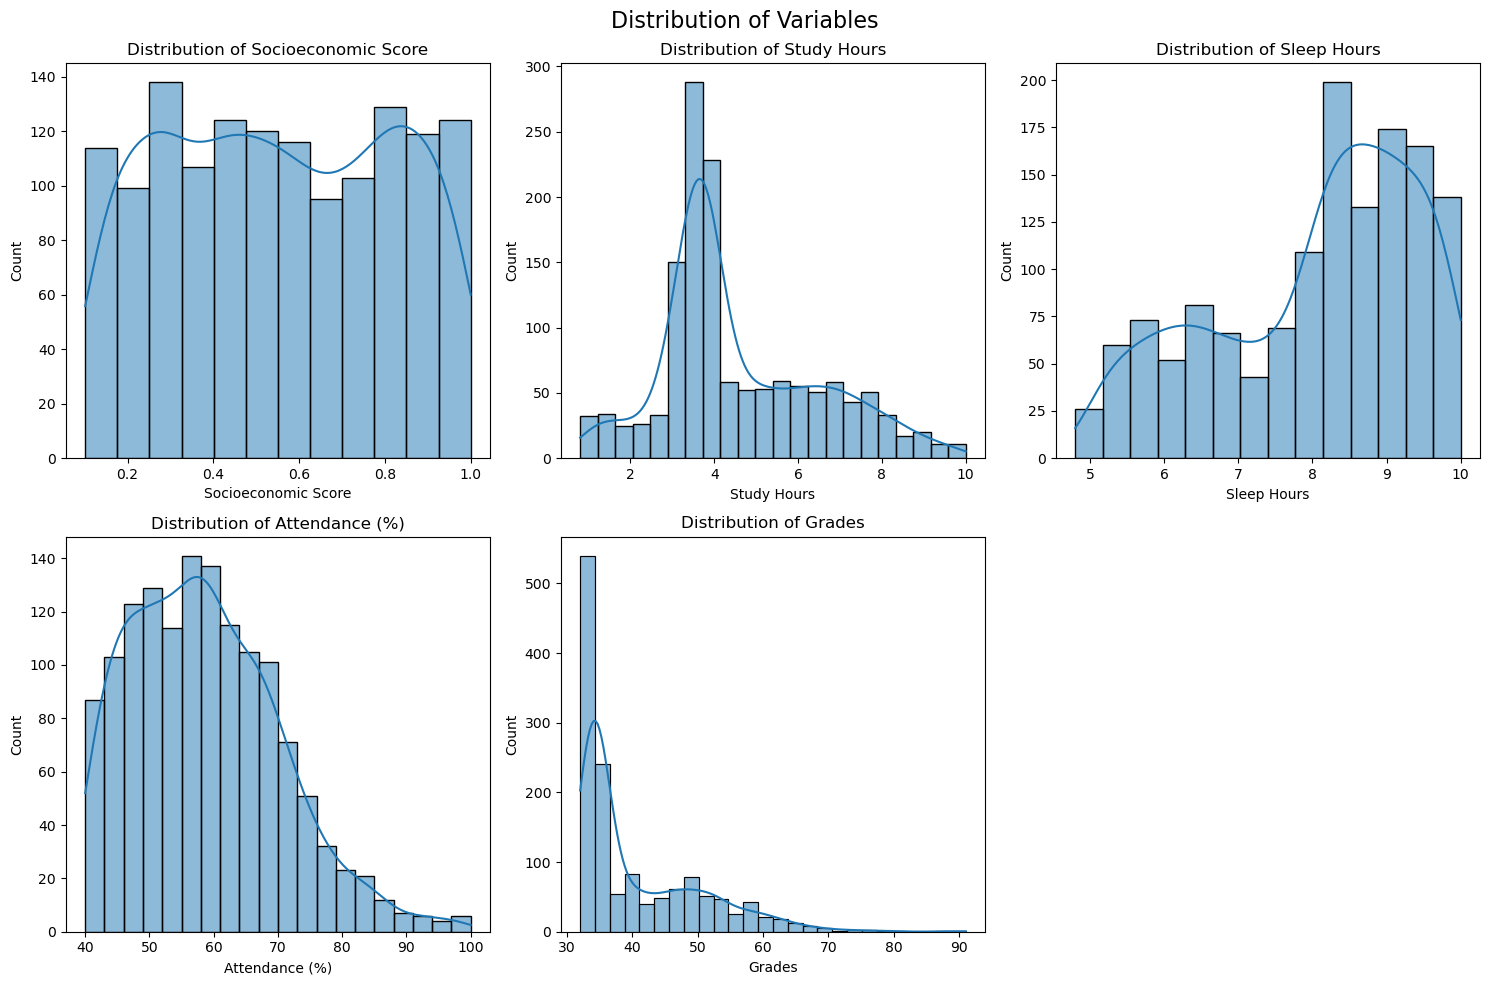

In [12]:
# Create histograms for each variable
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distribution of Variables', fontsize=16)

# Flatten axes for easier iteration
axes = axes.flatten()

# Create histograms
variables = ['Socioeconomic Score', 'Study Hours', 'Sleep Hours', 'Attendance (%)', 'Grades']
for i, var in enumerate(variables):
    sns.histplot(data=df, x=var, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {var}')

# Remove extra subplot
axes[-1].remove()

plt.tight_layout()
plt.show()

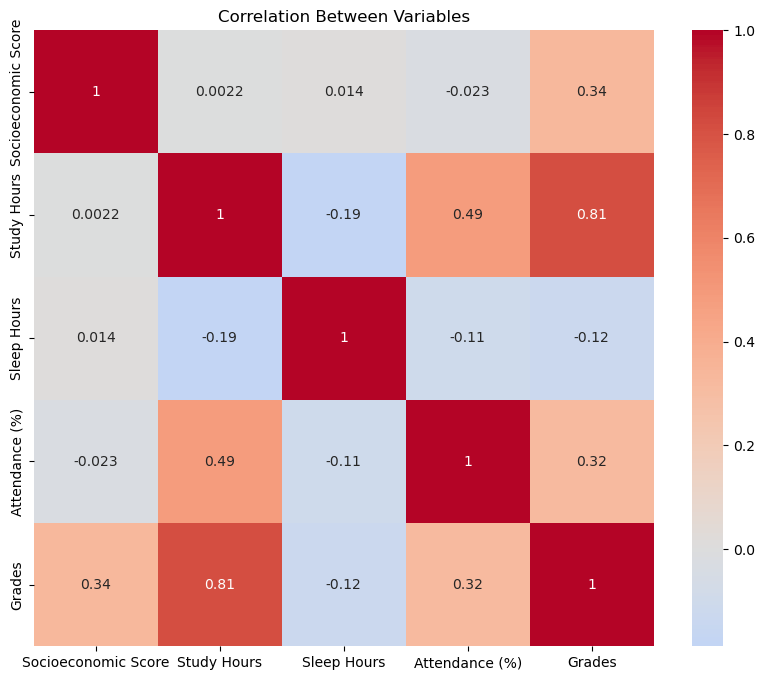


Correlations with Grades (sorted):


Grades                 1.000000
Study Hours            0.810807
Socioeconomic Score    0.335033
Attendance (%)         0.321930
Sleep Hours           -0.124689
Name: Grades, dtype: float64

In [13]:
# Create correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Variables')
plt.show()

# Display correlations with grades
print("\nCorrelations with Grades (sorted):")
correlations = df.corr()['Grades'].sort_values(ascending=False)
display(correlations)

## 5. Missing Value Analysis

In [15]:
# Check for missing values
print("Missing values in each column:")
display(df.isnull().sum())

print("\nPercentage of missing values:")
display((df.isnull().sum() / len(df) * 100).round(2))

Missing values in each column:


Socioeconomic Score    0
Study Hours            0
Sleep Hours            0
Attendance (%)         0
Grades                 0
dtype: int64


Percentage of missing values:


Socioeconomic Score    0.0
Study Hours            0.0
Sleep Hours            0.0
Attendance (%)         0.0
Grades                 0.0
dtype: float64

## 6. Creating and Analyzing Categories

Let's create categories to better understand patterns in our data:

In [17]:
# Create categories
df['Grade_Level'] = pd.qcut(df['Grades'], q=3, labels=['Low', 'Medium', 'High'])
df['Study_Level'] = pd.qcut(df['Study Hours'], q=3, labels=['Low', 'Medium', 'High'])
df['Attendance_Level'] = pd.qcut(df['Attendance (%)'], q=3, labels=['Low', 'Medium', 'High'])

# Display distributions
print("Grade Level Distribution:")
display(df['Grade_Level'].value_counts().sort_index())

print("\nStudy Level Distribution:")
display(df['Study_Level'].value_counts().sort_index())

print("\nAttendance Level Distribution:")
display(df['Attendance_Level'].value_counts().sort_index())

Grade Level Distribution:


Grade_Level
Low       540
Medium    405
High      443
Name: count, dtype: int64


Study Level Distribution:


Study_Level
Low       511
Medium    415
High      462
Name: count, dtype: int64


Attendance Level Distribution:


Attendance_Level
Low       482
Medium    467
High      439
Name: count, dtype: int64

## 7. Analyzing Student Groups

In [19]:
# Compare high and low performing students
high_performers = df[df['Grade_Level'] == 'High']
low_performers = df[df['Grade_Level'] == 'Low']

# Calculate statistics for each group
print("High Performers Average Statistics:")
display(high_performers[['Study Hours', 'Sleep Hours', 'Attendance (%)', 'Socioeconomic Score']].mean().round(2))

print("\nLow Performers Average Statistics:")
display(low_performers[['Study Hours', 'Sleep Hours', 'Attendance (%)', 'Socioeconomic Score']].mean().round(2))

High Performers Average Statistics:


Study Hours             6.60
Sleep Hours             7.88
Attendance (%)         63.14
Socioeconomic Score     0.66
dtype: float64


Low Performers Average Statistics:


Study Hours             3.31
Sleep Hours             8.08
Attendance (%)         55.59
Socioeconomic Score     0.47
dtype: float64

## 8. Creating Pivot Tables

Let's create pivot tables to understand relationships between variables:

In [21]:
# Create pivot tables for analysis
print("1. Average Grades by Study and Attendance Levels:")
study_attendance_pivot = pd.pivot_table(df,
                                       values='Grades',
                                       index='Study_Level',
                                       columns='Attendance_Level',
                                       aggfunc='mean')
display(study_attendance_pivot.round(2))

print("\n2. Average Metrics by Grade Level:")
grade_metrics = pd.pivot_table(df,
                              values=['Study Hours', 'Sleep Hours', 'Attendance (%)', 'Socioeconomic Score'],
                              index='Grade_Level',
                              aggfunc=['mean', 'std'])
display(grade_metrics.round(2))

print("\n3. Performance Summary by Grade Level:")
performance_summary = df.groupby('Grade_Level').agg({
    'Study Hours': 'mean',
    'Sleep Hours': 'mean',
    'Attendance (%)': 'mean',
    'Socioeconomic Score': 'mean',
    'Grades': ['count', 'mean', 'std']
}).round(2)
display(performance_summary)

1. Average Grades by Study and Attendance Levels:


C:\Users\calin\AppData\Local\Temp\ipykernel_9780\1892735296.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  study_attendance_pivot = pd.pivot_table(df,


Attendance_Level,Low,Medium,High
Study_Level,,,
Low,35.07,35.02,35.98
Medium,37.71,36.71,35.89
High,50.53,48.65,51.88



2. Average Metrics by Grade Level:


C:\Users\calin\AppData\Local\Temp\ipykernel_9780\1892735296.py:11: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  grade_metrics = pd.pivot_table(df,
C:\Users\calin\AppData\Local\Temp\ipykernel_9780\1892735296.py:11: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  grade_metrics = pd.pivot_table(df,


mean                                              \
            Attendance (%) Sleep Hours Socioeconomic Score Study Hours   
Grade_Level                                                              
Low                  55.59        8.08                0.47        3.31   
Medium               57.42        8.18                0.55        4.00   
High                 63.14        7.88                0.66        6.60   

                       std                                              
            Attendance (%) Sleep Hours Socioeconomic Score Study Hours  
Grade_Level                                                             
Low                  10.39        1.39                0.22        0.86  
Medium               10.16        1.32                0.25        1.15  
High                 12.99        1.38                0.28        1.68


3. Performance Summary by Grade Level:


C:\Users\calin\AppData\Local\Temp\ipykernel_9780\1892735296.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  performance_summary = df.groupby('Grade_Level').agg({


Study Hours Sleep Hours Attendance (%) Socioeconomic Score Grades  \
                   mean        mean           mean                mean  count   
Grade_Level                                                                     
Low                3.31        8.08          55.59                0.47    540   
Medium             4.00        8.18          57.42                0.55    405   
High               6.60        7.88          63.14                0.66    443   

                          
              mean   std  
Grade_Level               
Low          33.60  0.57  
Medium       36.94  2.41  
High         52.76  7.43

## 9. Predictive Modeling

Let's create a simple model to predict grades based on other factors:

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [24]:
# Prepare the data
X = df[['Socioeconomic Score', 'Study Hours', 'Sleep Hours', 'Attendance (%)']]
y = df['Grades']

# print(X,y)

In [25]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
# Make predictions
y_pred = model.predict(X_test)

# Print results
print("Model Performance:")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")

print("\nFeature Importance:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")


Model Performance:
R² Score: 0.7447

Feature Importance:
Socioeconomic Score: 12.1661
Study Hours: 4.2640
Sleep Hours: 0.1906
Attendance (%): -0.0664


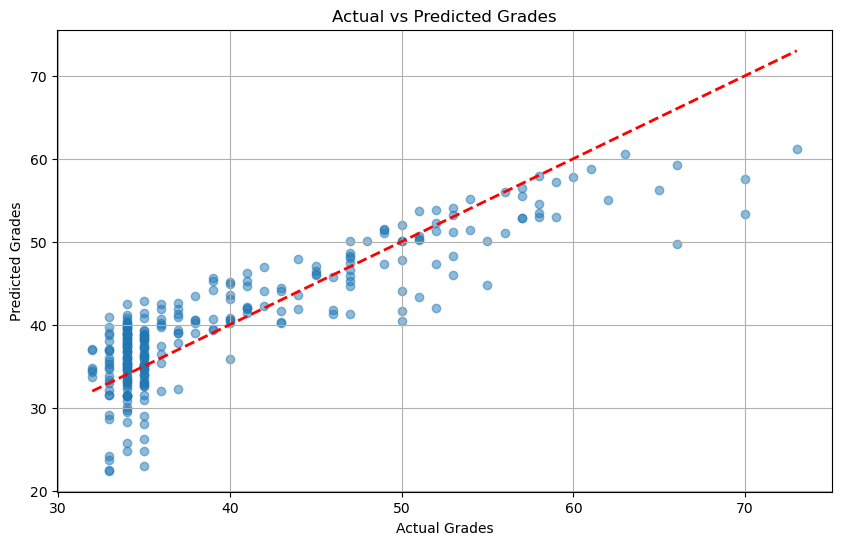

In [31]:
# Visualize predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Grades')
plt.ylabel('Predicted Grades')
plt.title('Actual vs Predicted Grades')
plt.grid(True)
plt.show()

In [ ]:
# Import joblib and save the model

from joblib import dump



print("Saving the trained model...")

dump(model, 'student_performance_model.joblib')

print("Model saved successfully!")



# Save feature information for future reference

feature_info = {

    'features': list(X.columns),

    'target': 'Grades'

}

dump(feature_info, 'model_features.joblib')

print("\nFeature information saved successfully!")